## Improving Water Consumption Management in Barcelona through Data Quality Enhancement and Prediction Models
#### **TFG 2023-2024**
#### **Author: Edith Ruiz Macià**

### Analysis of dataset Dataset2_v2.csv

#### **About the Notebook**

The aim of this notebook (.ipynb) is to analyze and modify the dataset dataset2_v2.csv provided by Aigües de Barcelona in order to improve the quality of the data and learn its insights through its visualization.

#### ***How to execute the code***
This is a Python Notebook, so the code should be run either cell by cell or by running all the notebook at once. At the beginning, review and make sure the paths to all datasets are correct for your folders distribution in order for everything to run smoothly.

#### ***Libraries and packages used in the project***
1. **pandas:** Library for data manipulation and analysis. It is used to work with data structures such as DataFrames.
2. **matplotlib.pyplot:** Used to create graphs and visualizations.
3. **matplotlib.dates:** Used to create graphs and visualizations.
4. **numpy:** Fundamental library for numerical computation.
5. **seaborn:** Data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive statistical graphs.
6. **sklearn.preprocessing:** Provides functions to preprocess data before fitting a model.
7. **sklearn.model_selection:** Provides tools to split data sets into training and test subsets for a model.
8. **sklearn.metrics:** Contains metrics for evaluating models.
9. **sklearn.feature_selection:** Library to select the best features for training a model.
10. **sklearn.linear_model**: Contains implementations of linear regression models.
11. **sklearn.ensemble:** Contains implementations of ensemble models such as Random Forest.
12. **xgboost:** Library to implement Gradient Boosting models.
13. **sklearn.neighbors:** Library to implement K-Nearest Neighbors models.
14. **sklearn.svm:** Library to implement Support Vector Machine models.
15. **shap:** Library used to compute the shap values of a model and model explainability.

In [54]:
# In case you are working in google colab you can mount your google drive account here
# from google.colab import drive
# drive.mount('/content/drive')

## 0. Importing datasets and libraries

In [55]:
!pip install shap

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [56]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import shap

In [57]:
# Change your path of the data if necessary
dataset2 = 'C:/Users/edith/Desktop/TFG/Datasets/Aigües de Barcelona/Dataset2_V2/dataset2_v2.csv'
dataset2 = pd.read_csv(dataset2)
dataset2.head()

,ID,Diàmetre (mm)/Diámetro (mm)/Diameter (mm),Ús/Uso/Use,Tipus d'activitat econòmica/Tipo de actividad económica/Type of economic activity,Data/Fecha/Date,Hora/Hora/Time,Consum (L/h)/Consumo (L/h)/Consumption (L/h)
0,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,01:16:35,0.0
1,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,02:16:35,0.0
2,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,03:16:35,0.0
3,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,04:16:35,0.0
4,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,05:16:35,0.0


## 1. Exploratory Data Analysis

As a starting point, we need to explore the data. We analyze the summary of descriptive statistics and plots for each of the datasets in order to detect the corresponding anomalies and subsequently process them correctly.

In [58]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100822 entries, 0 to 2100821
Data columns (total 7 columns):
 #   Column                                                                             Dtype  
---  ------                                                                             -----  
 0   ID                                                                                 object 
 1   Diàmetre (mm)/Diámetro (mm)/Diameter (mm)                                          int64  
 2   Ús/Uso/Use                                                                         object 
 3   Tipus d'activitat econòmica/Tipo de actividad económica/Type of economic activity  object 
 4   Data/Fecha/Date                                                                    object 
 5   Hora/Hora/Time                                                                     object 
 6   Consum (L/h)/Consumo (L/h)/Consumption (L/h)                                       float64
dtypes: float64(1), int6

In [59]:
dataset2.describe()

,Diàmetre (mm)/Diámetro (mm)/Diameter (mm),Consum (L/h)/Consumo (L/h)/Consumption (L/h)
count,2.100822e+06,2.100822e+06
mean,1.563855e+01,1.868788e+01
std,4.053633e+00,1.006044e+02
min,1.500000e+01,-3.280000e+02
25%,1.500000e+01,0.000000e+00
50%,1.500000e+01,0.000000e+00
75%,1.500000e+01,1.000000e+01
max,6.500000e+01,9.350000e+03


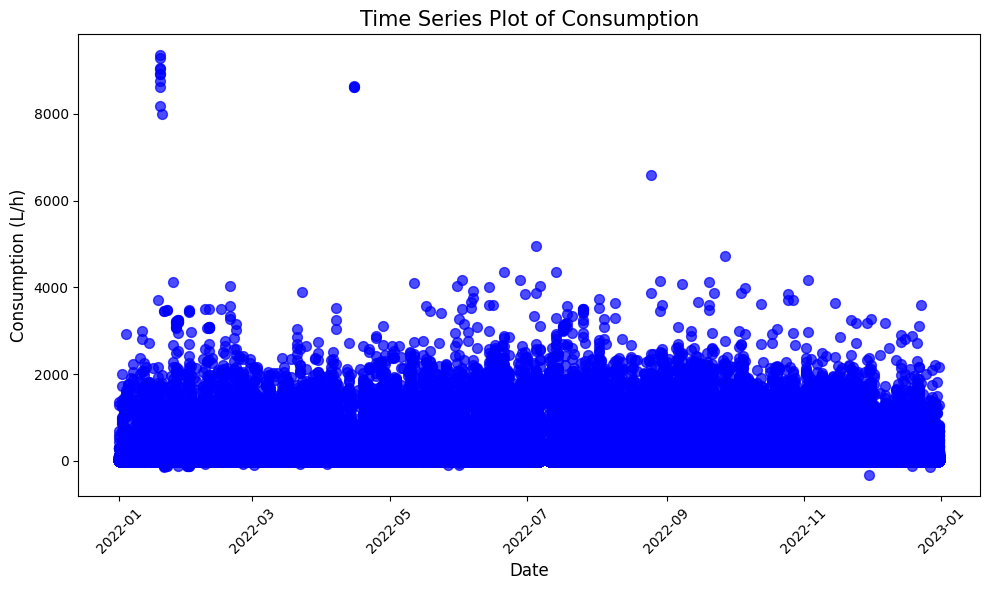

In [60]:
# Consumption over Time
dataset2['Data/Fecha/Date'] = pd.to_datetime(dataset2['Data/Fecha/Date'])
plt.figure(figsize=(10, 6))
plt.scatter(dataset2['Data/Fecha/Date'], dataset2['Consum (L/h)/Consumo (L/h)/Consumption (L/h)'], color='blue', marker='o', s=50, alpha=0.7, label='Data Points')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Consumption (L/h)', fontsize=12)
plt.title('Time Series Plot of Consumption', fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

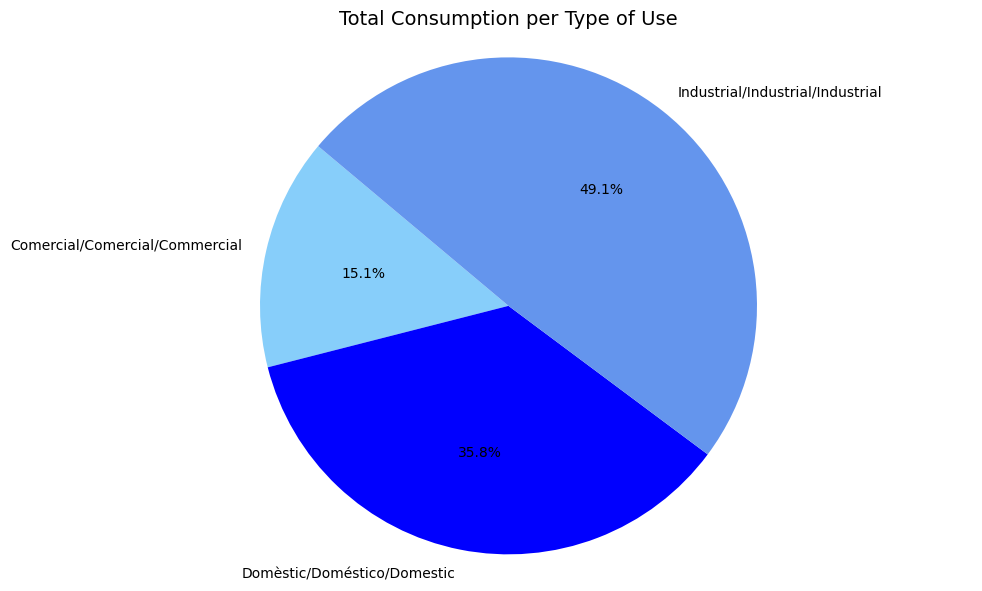

In [61]:
# Aggregate total consumption for each type of use
total_consumption_per_use = dataset2.groupby('Ús/Uso/Use')['Consum (L/h)/Consumo (L/h)/Consumption (L/h)'].sum()
plt.figure(figsize=(10, 6))
total_consumption_per_use.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightskyblue', 'blue', 'cornflowerblue'])
plt.title('Total Consumption per Type of Use', fontsize=14)
plt.ylabel(None)
plt.tight_layout()
plt.axis('equal')
plt.show()

**Insights:**
- There are a significant number of zero values in Consumption. This can affect the performance of the model, especially in linear regression, since the presence of many zeros can affect the assumption of linearity.
- Negative consumption values are considered as incorrect values for the Consumption (L/h) column. Consumption has to be positive.

## 2. Data Preprocessing

##### **2.1. Data Transformation**

In [62]:
# Rename dataset2_v2 columns
new_column_names = {
    'ID': 'ID',
    'Diàmetre (mm)/Diámetro (mm)/Diameter (mm)': 'Diameter (mm)',
    'Ús/Uso/Use': 'Use',
    "Tipus d'activitat econòmica/Tipo de actividad económica/Type of economic activity": 'Type of economic activity',
    'Data/Fecha/Date': 'Date',
    'Hora/Hora/Time': 'Time',
    'Consum (L/h)/Consumo (L/h)/Consumption (L/h)': 'Consumption (L/h)'
}

dataset2.rename(columns=new_column_names, inplace=True)

In [63]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100822 entries, 0 to 2100821
Data columns (total 7 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   ID                         object        
 1   Diameter (mm)              int64         
 2   Use                        object        
 3   Type of economic activity  object        
 4   Date                       datetime64[ns]
 5   Time                       object        
 6   Consumption (L/h)          float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 112.2+ MB


##### **2.2. Null Values**

In [64]:
# Null values per column
count = 0
columns_dataset2 = dataset2.columns
for column in columns_dataset2:
  print("Column:", column, "- Null values: ", dataset2[column].isnull().sum())

Column: ID - Null values:  0
Column: Diameter (mm) - Null values:  0
Column: Use - Null values:  0
Column: Type of economic activity - Null values:  0
Column: Date - Null values:  0
Column: Time - Null values:  0
Column: Consumption (L/h) - Null values:  0


##### **2.3. Wrong Values**

Now we want to identify the erroneous values in our data. We consider as wrong values the negative consumptions. We will store those values for later analysis.

In [65]:
# We identify negative values in consumption
num_negative_consum_rows = len(dataset2[dataset2['Consumption (L/h)'] < 0])
print("Negative in 'Consumption (L/h)' in the dataset:", num_negative_consum_rows)

Negative in 'Consumption (L/h)' in the dataset: 567


In [66]:
# Copy the negative values into the anomalies dataset for later analysis
anomalies = dataset2[dataset2['Consumption (L/h)'] < 0].copy()
anomalies.head()

,ID,Diameter (mm),Use,Type of economic activity,Date,Time,Consumption (L/h)
255826,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-01-21,03:42:02,-1.0
258447,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-05-15,08:35:11,-2.0
258476,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-05-16,13:35:05,-18.0
258749,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-05-28,18:34:21,-1.0
258989,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-06-08,08:33:38,-1.0


In [67]:
# Replace negative values in Consumption (L/h) by null
dataset2_1 = dataset2.copy()
dataset2_1.loc[dataset2_1['Consumption (L/h)'] < 0, 'Consumption (L/h)'] = np.nan

# Number of negative values in Consumption (L/h) after removing negative values
num_negative_consum_rows2 = len(dataset2_1[dataset2_1['Consumption (L/h)'] < 0])
print("Negative in 'Consumption (L/h)' in the dataset:", num_negative_consum_rows2)

# Number of null values in Consumption (L/h) after removing negative values
print("Number of Nulls in the dataset without negative values:", dataset2_1['Consumption (L/h)'].isnull().sum())

Negative in 'Consumption (L/h)' in the dataset: 0
Number of Nulls in the dataset without negative values: 567


##### **2.4. Outliers**

In [68]:
# Treatment of outliers in Consumption (L/h) with the IQR method

# We separate according to USE: Industrial, Domestic or Commercial
domestic_df = dataset2_1[dataset2_1['Use'].str.contains('Domèstic', case=False, na=False)].copy()
industrial_df = dataset2_1[dataset2_1['Use'].str.contains('Industrial', case=False, na=False)].copy()
comercial_df = dataset2_1[dataset2_1['Use'].str.contains('Comercial', case=False, na=False)].copy()

def outliers_iqr(dataframe):
    global anomalies

    # We compute the IQR for the 'Consumption' column
    consum_col = 'Consumption (L/h)'
    Q1 = dataframe[consum_col].quantile(0.25)
    Q3 = dataframe[consum_col].quantile(0.75)
    IQR = Q3 - Q1

    # We identify the outliers
    outlier_filter = ((dataframe[consum_col] < (Q1 - 1.5 * IQR)) | (dataframe[consum_col] > (Q3 + 1.5 * IQR)))
    
    # Copy the outlier value into the anomalies dataset for later analysis
    outliers = dataframe[outlier_filter].copy()
    anomalies = pd.concat([anomalies, outliers], ignore_index=True)
    
    # And replace them with null
    dataframe.loc[outlier_filter, consum_col] = np.nan

    return dataframe

# We apply the function for each dataframe corresponding to each "Use"
domestic_df = outliers_iqr(domestic_df)
industrial_df = outliers_iqr(industrial_df)
comercial_df = outliers_iqr(comercial_df)

dataset2_filtered = pd.concat([domestic_df, industrial_df, comercial_df], ignore_index=True)

In [69]:
anomalies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286754 entries, 0 to 286753
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ID                         286754 non-null  object        
 1   Diameter (mm)              286754 non-null  int64         
 2   Use                        286754 non-null  object        
 3   Type of economic activity  286754 non-null  object        
 4   Date                       286754 non-null  datetime64[ns]
 5   Time                       286754 non-null  object        
 6   Consumption (L/h)          286754 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 15.3+ MB


In [70]:
# Number of null values in Consumption (L/h) prior to removing outliers
print("Number of Nulls in the dataset with outliers but no negatives:", dataset2_1['Consumption (L/h)'].isnull().sum())   #dataset with outliers

# Number of null values in Consumption (L/h) after removing outliers
print("Number of Nulls in the dataset without outliers nor negatives:", dataset2_filtered['Consumption (L/h)'].isnull().sum()) #dataset without outliers

Number of Nulls in the dataset with outliers but no negatives: 567
Number of Nulls in the dataset without outliers nor negatives: 286754


##### **2.5. Storage of Anomalies**

If all anomalies in the data have been cleaned correctly we should have the sum of the number of outlier values and negatives remaining in our anomalies stored.

Negative values removed = 567

Outliers removed = 286754 - 567 = 286187

Total number of anomalies = 286754

In [71]:
# Save current clean dataset for classification of anomalies
clean_data = dataset2_filtered.copy()

anomalies.head()

,ID,Diameter (mm),Use,Type of economic activity,Date,Time,Consumption (L/h)
0,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-01-21,03:42:02,-1.0
1,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-05-15,08:35:11,-2.0
2,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-05-16,13:35:05,-18.0
3,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-05-28,18:34:21,-1.0
4,25dad700550a3792c875e4fcbfb990067748c5b760b8e8...,15,Comercial/Comercial/Commercial,"* de vehicles automòbils, bicicletes i altres/...",2022-06-08,08:33:38,-1.0


## 3. Data Enhancement


In [72]:
# Convert "Date" and "Time" column to datetime
dataset2_filtered['Date'] = pd.to_datetime(dataset2_filtered['Date'])
dataset2_filtered['Time'] = pd.to_datetime(dataset2_filtered['Time']).dt.time
dataset2_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100822 entries, 0 to 2100821
Data columns (total 7 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   ID                         object        
 1   Diameter (mm)              int64         
 2   Use                        object        
 3   Type of economic activity  object        
 4   Date                       datetime64[ns]
 5   Time                       object        
 6   Consumption (L/h)          float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 112.2+ MB


In [73]:
# We create a new "Day time" column based on the "Time" column
def map_to_time(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 21:
        return 'Afternoon'
    else:
        return 'Night'
    
dataset2_filtered['Day time'] = dataset2_filtered['Time'].map(map_to_time)

# We create a new "Season" column based on the "Date" column
def map_to_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

dataset2_filtered['Season'] = dataset2_filtered['Date'].dt.month.map(map_to_season)

# We create a new column "Day_of_Week" based on the column "Date"
dataset2_filtered['Day of Week'] = dataset2_filtered['Date'].dt.day_name()

# We create a new column "Month" based on the column "Date"
dataset2_filtered['Month'] = dataset2_filtered['Date'].dt.month

# We create a new column "Year" based on the column "Date"
dataset2_filtered['Year'] = dataset2_filtered['Date'].dt.year

dataset2_filtered.head()

,ID,Diameter (mm),Use,Type of economic activity,Date,Time,Consumption (L/h),Day time,Season,Day of Week,Month,Year
0,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,01:16:35,0.0,Night,Winter,Saturday,1,2022
1,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,02:16:35,0.0,Night,Winter,Saturday,1,2022
2,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,03:16:35,0.0,Night,Winter,Saturday,1,2022
3,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,04:16:35,0.0,Night,Winter,Saturday,1,2022
4,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,05:16:35,0.0,Night,Winter,Saturday,1,2022


As we can see now all data in this dataset is from year 2022. This is important as now we are going to add new information from other datasets and we are going to need the dates to match.

In [74]:
dataset2_filtered['Year'].unique()

array([2022], dtype=int64)

In [75]:
temperature = 'C:/Users/edith/Desktop/TFG\Datasets/Dades meteorològiques de la XEMA/Temperature_Dades_Meteorologiques_XEMA.csv'
temperature = pd.read_csv(temperature)
temperature['DATA_LECTURA'] = pd.to_datetime(temperature['DATA_LECTURA'])
temperature['HORA_LECTURA'] = temperature['DATA_LECTURA'].dt.time
temperature['DATA_LECTURA'] = temperature['DATA_LECTURA'].dt.date
temperature['DATA_LECTURA'] = pd.to_datetime(temperature['DATA_LECTURA'])
temperature = temperature.groupby(['DATA_LECTURA', 'HORA_LECTURA'])['VALOR_LECTURA'].mean().reset_index()
temperature.head(5)

,DATA_LECTURA,HORA_LECTURA,VALOR_LECTURA
0,2019-01-01,00:00:00,8.957143
1,2019-01-01,00:30:00,8.814286
2,2019-01-01,01:00:00,8.800000
3,2019-01-01,01:30:00,8.728571
4,2019-01-01,02:00:00,8.228571


In [76]:
rel_humidity = 'C:/Users/edith/Desktop/TFG\Datasets/Dades meteorològiques de la XEMA/Relative_Humidity_Dades_Meteorologiques_XEMA.csv'
rel_humidity = pd.read_csv(rel_humidity)
rel_humidity['DATA_LECTURA'] = pd.to_datetime(rel_humidity['DATA_LECTURA'])
rel_humidity['HORA_LECTURA'] = rel_humidity['DATA_LECTURA'].dt.time
rel_humidity['DATA_LECTURA'] = rel_humidity['DATA_LECTURA'].dt.date
rel_humidity['DATA_LECTURA'] = pd.to_datetime(rel_humidity['DATA_LECTURA'])
rel_humidity = rel_humidity.groupby(['DATA_LECTURA', 'HORA_LECTURA'])['VALOR_LECTURA'].mean().reset_index()
rel_humidity.head(5)

,DATA_LECTURA,HORA_LECTURA,VALOR_LECTURA
0,2019-01-01,00:00:00,56.142857
1,2019-01-01,00:30:00,57.857143
2,2019-01-01,01:00:00,58.428571
3,2019-01-01,01:30:00,58.428571
4,2019-01-01,02:00:00,60.571429


In [77]:
atm_pressure = 'C:/Users/edith/Desktop/TFG\Datasets/Dades meteorològiques de la XEMA/Atmospheric_Pressure_Dades_Meteorologiques_XEMA.csv'
atm_pressure = pd.read_csv(atm_pressure)
atm_pressure['DATA_LECTURA'] = pd.to_datetime(atm_pressure['DATA_LECTURA'])
atm_pressure['HORA_LECTURA'] = atm_pressure['DATA_LECTURA'].dt.time
atm_pressure['DATA_LECTURA'] = atm_pressure['DATA_LECTURA'].dt.date
atm_pressure['DATA_LECTURA'] = pd.to_datetime(atm_pressure['DATA_LECTURA'])
atm_pressure = atm_pressure.groupby(['DATA_LECTURA', 'HORA_LECTURA'])['VALOR_LECTURA'].mean().reset_index()
atm_pressure.head(5)

,DATA_LECTURA,HORA_LECTURA,VALOR_LECTURA
0,2019-01-01,00:00:00,1010.725
1,2019-01-01,00:30:00,1010.725
2,2019-01-01,01:00:00,1010.900
3,2019-01-01,01:30:00,1011.200
4,2019-01-01,02:00:00,1011.550


In [78]:
precipitation = 'C:/Users/edith/Desktop/TFG\Datasets/Dades meteorològiques de la XEMA/Precipitation_Dades_Meteorologiques_XEMA.csv'
precipitation = pd.read_csv(precipitation)
precipitation['DATA_LECTURA'] = pd.to_datetime(precipitation['DATA_LECTURA'])
precipitation['HORA_LECTURA'] = precipitation['DATA_LECTURA'].dt.time
precipitation['DATA_LECTURA'] = precipitation['DATA_LECTURA'].dt.date
precipitation['DATA_LECTURA'] = pd.to_datetime(precipitation['DATA_LECTURA'])
precipitation = precipitation.groupby(['DATA_LECTURA', 'HORA_LECTURA'])['VALOR_LECTURA'].mean().reset_index()
precipitation.head(5)

,DATA_LECTURA,HORA_LECTURA,VALOR_LECTURA
0,2019-01-01,00:00:00,0.0
1,2019-01-01,00:30:00,0.0
2,2019-01-01,01:00:00,0.0
3,2019-01-01,01:30:00,0.0
4,2019-01-01,02:00:00,0.0


In [79]:
solar_rad = 'C:/Users/edith/Desktop/TFG\Datasets/Dades meteorològiques de la XEMA/Solar_Radation_global_Dades_Meteorologiques_XEMA.csv'
solar_rad = pd.read_csv(solar_rad)
solar_rad['DATA_LECTURA'] = pd.to_datetime(solar_rad['DATA_LECTURA'])
solar_rad['HORA_LECTURA'] = solar_rad['DATA_LECTURA'].dt.time
solar_rad['DATA_LECTURA'] = solar_rad['DATA_LECTURA'].dt.date
solar_rad['DATA_LECTURA'] = pd.to_datetime(solar_rad['DATA_LECTURA'])
solar_rad = solar_rad.groupby(['DATA_LECTURA', 'HORA_LECTURA'])['VALOR_LECTURA'].mean().reset_index()
solar_rad.head(5)

,DATA_LECTURA,HORA_LECTURA,VALOR_LECTURA
0,2019-01-01,00:00:00,0.0
1,2019-01-01,00:30:00,0.0
2,2019-01-01,01:00:00,0.0
3,2019-01-01,01:30:00,0.0
4,2019-01-01,02:00:00,0.0


In [80]:
def round_time_to_nearest_half_hour(time):
    # Convert time to seconds since midnight
    seconds = (time.hour * 3600) + (time.minute * 60) + time.second
    
    # Calculate the nearest half hour in seconds
    nearest_half_hour = round(seconds / 1800) * 1800
    
    # Convert back to hours, minutes, and seconds
    rounded_hour = nearest_half_hour // 3600
    nearest_half_hour %= 3600
    rounded_minute = nearest_half_hour // 60
    rounded_second = nearest_half_hour % 60
    
    if rounded_hour == 24:  # Handle the special case where the rounded time is exactly midnight
        rounded_hour = 00
    
    return pd.to_datetime(f"{rounded_hour:02}:{rounded_minute:02}:{rounded_second:02}").time()


dataset2_filtered["Time"] = pd.to_datetime(dataset2_filtered["Time"], format='%H:%M:%S', errors='coerce').dt.time
dataset2_filtered["Time"] = dataset2_filtered["Time"].apply(round_time_to_nearest_half_hour)

In [81]:
def mapping_geotemporal(dataset, geotemporal, attribute):

    # Merge dataset with geotemporal on 'Date' and 'Time'
    dataset = pd.merge(
        dataset, 
        geotemporal, 
        left_on=['Date', 'Time'], 
        right_on=['DATA_LECTURA', 'HORA_LECTURA'],
        how='left'
    )

    # Drop 'DATA_LECTURA' and 'HORA_LECTURA' and rename 'VALOR_LECTURA'
    dataset.drop(columns=['DATA_LECTURA', 'HORA_LECTURA'], inplace=True)
    dataset.rename(columns = {'VALOR_LECTURA': attribute}, inplace=True)

    return dataset


dataset2_filtered = mapping_geotemporal(dataset2_filtered, temperature, "Temperature")
dataset2_filtered = mapping_geotemporal(dataset2_filtered, rel_humidity, "Relative Humidity")
dataset2_filtered = mapping_geotemporal(dataset2_filtered, atm_pressure, "Atmospheric Pressure")
dataset2_filtered = mapping_geotemporal(dataset2_filtered, precipitation, "Precipitation")
dataset2_filtered = mapping_geotemporal(dataset2_filtered, solar_rad, "Solar Radiation global")
dataset2_filtered.head()

,ID,Diameter (mm),Use,Type of economic activity,Date,Time,Consumption (L/h),Day time,Season,Day of Week,Month,Year,Temperature,Relative Humidity,Atmospheric Pressure,Precipitation,Solar Radiation global
0,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,01:30:00,0.0,Night,Winter,Saturday,1,2022,4.628571,66.714286,1012.600,0.0,0.0
1,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,02:30:00,0.0,Night,Winter,Saturday,1,2022,4.571429,65.857143,1012.625,0.0,0.0
2,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,03:30:00,0.0,Night,Winter,Saturday,1,2022,4.657143,60.571429,1012.575,0.0,0.0
3,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,04:30:00,0.0,Night,Winter,Saturday,1,2022,4.442857,59.285714,1012.750,0.0,0.0
4,d6820111d10fcde14bf3fb393cc188d5c684b073797453...,15,Domèstic/Doméstico/Domestic,<NULL>/ <NULL>/ <NULL>,2022-01-22,05:30:00,0.0,Night,Winter,Saturday,1,2022,4.142857,59.571429,1013.175,0.0,0.0


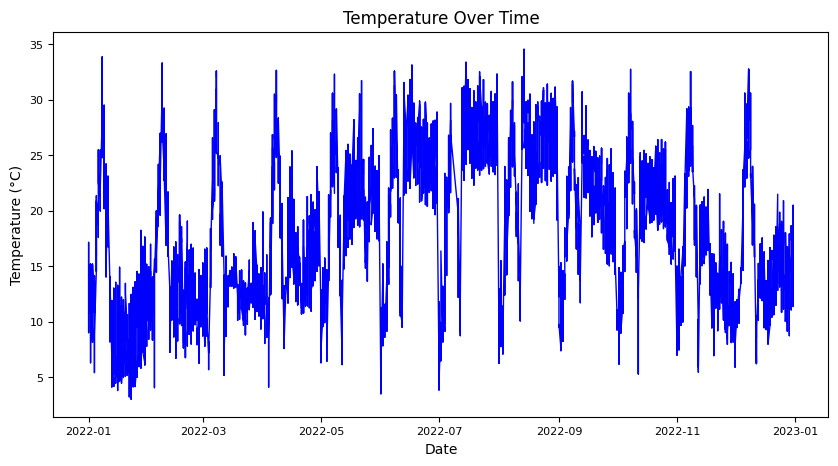

In [82]:
# Temperature Over Time
df_sorted = dataset2_filtered.sort_values(by='Date')
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Date'], df_sorted['Temperature'], color='blue', linewidth=1)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Temperature (°C)', fontsize=10)
plt.title('Temperature Over Time', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

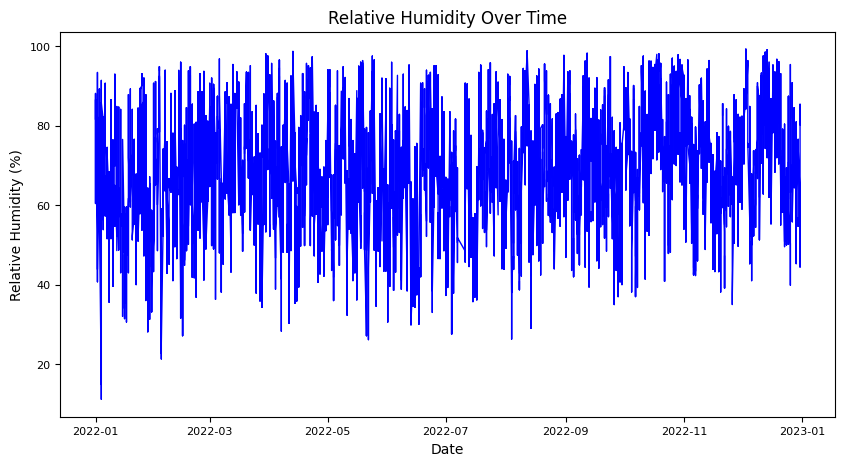

In [83]:
# Relative Humidity Over Time
df_sorted = dataset2_filtered.sort_values(by='Date')
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Date'], df_sorted['Relative Humidity'], color='blue', linewidth=1)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Relative Humidity (%)', fontsize=10)
plt.title('Relative Humidity Over Time', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

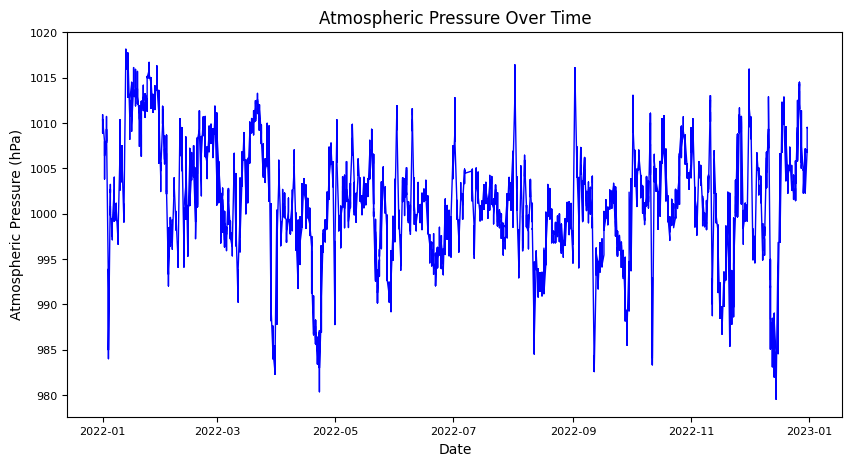

In [84]:
# Atmospheric Pressure Over Time
df_sorted = dataset2_filtered.sort_values(by='Date')
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Date'], df_sorted['Atmospheric Pressure'], color='blue', linewidth=1)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Atmospheric Pressure (hPa)', fontsize=10)
plt.title('Atmospheric Pressure Over Time', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

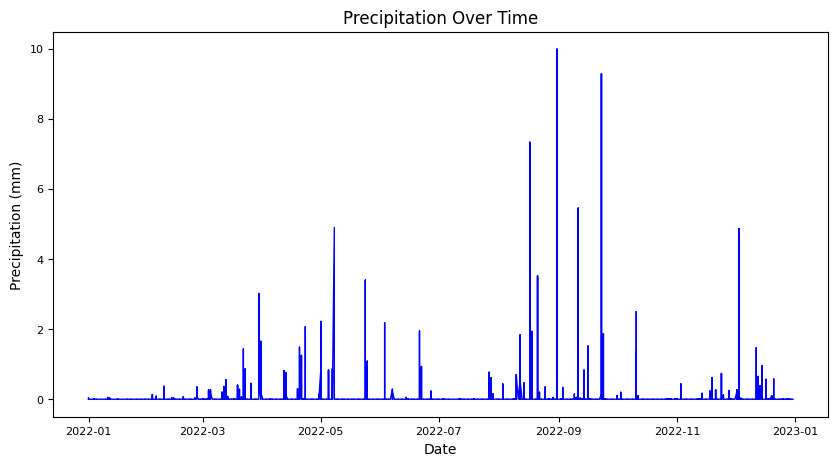

In [85]:
# Precipitation Over Time
df_sorted = dataset2_filtered.sort_values(by='Date')
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Date'], df_sorted['Precipitation'], color='blue', linewidth=1)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Precipitation (mm)', fontsize=10)
plt.title('Precipitation Over Time', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

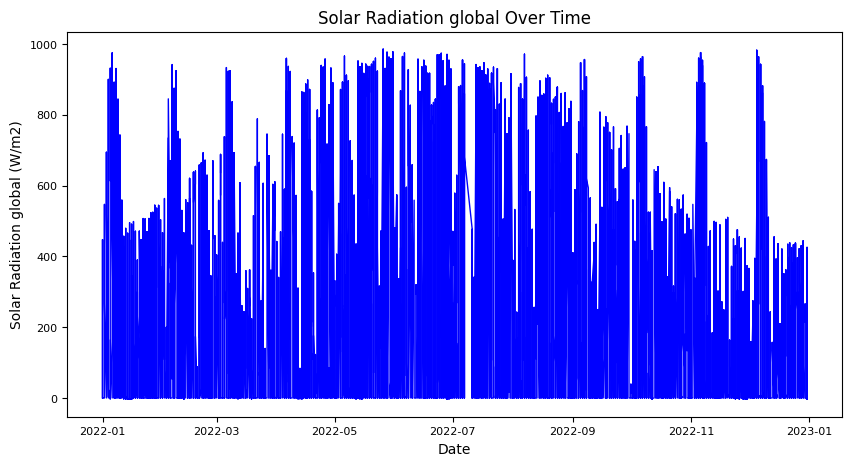

In [86]:
# Solar Radation global Over Time
df_sorted = dataset2_filtered.sort_values(by='Date')
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Date'], df_sorted['Solar Radiation global'], color='blue', linewidth=1)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Solar Radiation global (W/m2)', fontsize=10)
plt.title('Solar Radiation global Over Time', fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## 4. Data Prediction

##### **4.1. Linear**

In order to do the projection of incorrect values (negative and outliers) that right now happen to be null values in the dataset, we will implement several data prediction models, compare their results and conclude which gives the best results for our data.

We will now encode the variables that aren't numerical in order to work with them and plot a correlation matrix to see which features explain best our target variable, Accumulated Consumption (L/day).

In [39]:
# Convert "Date" column to object for label encoding
dataset2_filtered['Date'] = dataset2_filtered['Date'].astype(object)
dataset2_filtered['Time'] = dataset2_filtered['Time'].astype(object)

In [40]:
# Label Encoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column containing categorical data
for column in dataset2_filtered.columns:
    if dataset2_filtered[column].dtype == 'object':
        dataset2_filtered[column] = label_encoder.fit_transform(dataset2_filtered[column])

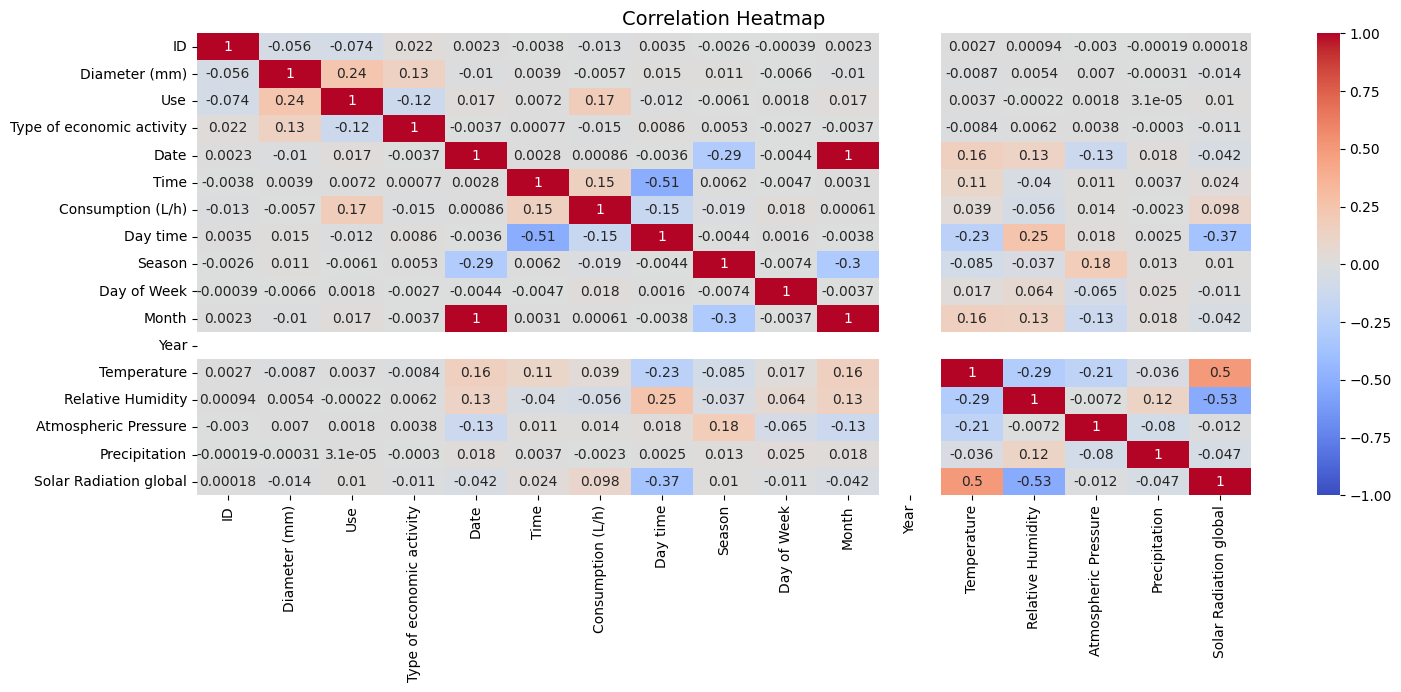

In [41]:
dataset2_filtered_not_null = dataset2_filtered[~dataset2_filtered['Consumption (L/h)'].isnull()]
corr = dataset2_filtered_not_null.corr()
plt.figure(figsize=(17,6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14})
plt.show()

##### **4.1. Linear Regression**

In [42]:
# Model Training

# We remove the null values in the consumption column to train the model
dataset2_filtered2 = dataset2_filtered.dropna(subset=['Consumption (L/h)'])

# Independent variables
features = ["Diameter (mm)", "Use", "Type of economic activity", "Date", "Time", "Day time", "Season", "Day of Week",
            "Month", "Temperature", "Relative Humidity", "Atmospheric Pressure", "Precipitation", "Solar Radiation global"]

X = dataset2_filtered2[features]

# Target variable (dependent variable)
y = dataset2_filtered2['Consumption (L/h)']

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We make sure that X and Y have the same length for both train and test
print("Lenght X_train:", len(X_train))
print("Length y_train:", len(y_train))
print("Lenght X_test:", len(X_test))
print("Length y_test:", len(y_test))

Lenght X_train: 1451254
Length y_train: 1451254
Lenght X_test: 362814
Length y_test: 362814


In [43]:
# Create a model
lr_model = LinearRegression()

# Create RFECV object with custom parameters
selector = RFECV(estimator=lr_model, step=1, cv=5, min_features_to_select=3) # 5-fold cross-validation

# Fit RFECV
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]

# Train model with selected features
lr_model.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test[selected_features])

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

print(f"Linear Regression Mean Squared Error (MSE): {round(np.sqrt(mse_lr), 4)}")
print(f"Linear Regression Mean Absolute Error (MAE): {round(mae_lr, 4)}")
print(f"Linear Regression R-squared (R2): {round(r2_lr, 4)}")
print("\nSelected independent variables: ", selected_features)

Linear Regression Mean Squared Error (MSE): 6.3164
Linear Regression Mean Absolute Error (MAE): 4.419
Linear Regression R-squared (R2): 0.0688

Selected independent variables:  Index(['Diameter (mm)', 'Use', 'Type of economic activity', 'Date', 'Time',
       'Day time', 'Season', 'Day of Week', 'Month', 'Temperature',
       'Relative Humidity', 'Atmospheric Pressure', 'Precipitation',
       'Solar Radation global'],
      dtype='object')


##### **4.2. Random Forest**

In [51]:
# Model Training

# We remove the null values in the consumption column to train the model
dataset2_filtered2 = dataset2_filtered.dropna(subset=['Consumption (L/h)'])

# Reduce the working dataset
rows = len(dataset2_filtered2) // 50
dataset2_filtered2 = dataset2_filtered2.sample(n=rows, random_state=42)

# Independent variables
features = ["Diameter (mm)", "Use", "Type of economic activity", "Date", "Time", "Day time", "Season", "Day of Week",
            "Month", "Temperature", "Relative Humidity", "Atmospheric Pressure", "Precipitation", "Solar Radiation global"]

X = dataset2_filtered2[features]

# Target variable (dependent variable)
y = dataset2_filtered2['Consumption (L/h)']

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We make sure that X and Y have the same length for both train and test
print("Lenght X_train:", len(X_train))
print("Length y_train:", len(y_train))
print("Lenght X_test:", len(X_test))
print("Length y_test:", len(y_test))

Lenght X_train: 29024
Length y_train: 29024
Lenght X_test: 7257
Length y_test: 7257


In [52]:
# Create a model
rf_model = RandomForestRegressor(random_state=42)

# Create RFECV object with custom parameters
selector = RFECV(estimator=rf_model, step=1, cv=5, min_features_to_select=3) # 5-fold cross-validation

# Fit RFECV
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]

# Train model with selected features
rf_model.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test[selected_features])

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest Mean Squared Error (MSE):", round(np.sqrt(mse_rf), 4))
print(f"Random Forest Mean Absolute Error (MAE): {round(mae_rf, 4)}")
print(f"Random Forest R-squared (R2):", round(r2_rf, 4))
print("\nSelected independent variables: ", selected_features)

Random Forest Mean Squared Error (MSE): 6.4703
Random Forest Mean Absolute Error (MAE): 4.2277
Random Forest R-squared (R2): 0.0148

Selected independent variables:  Index(['Diameter (mm)', 'Use', 'Type of economic activity', 'Date', 'Time',
       'Day time', 'Season', 'Day of Week', 'Month', 'Temperature',
       'Relative Humidity', 'Atmospheric Pressure', 'Precipitation',
       'Solar Radation global'],
      dtype='object')


##### **4.3. XGBoost**

In [53]:
# Model Training

# We remove the null values in the consumption column to train the model
dataset2_filtered2 = dataset2_filtered.dropna(subset=['Consumption (L/h)'])

# Independent variables
features = ["Diameter (mm)", "Use", "Type of economic activity", "Date", "Time", "Day time", "Season", "Day of Week",
            "Month", "Temperature", "Relative Humidity", "Atmospheric Pressure", "Precipitation", "Solar Radiation global"]

X = dataset2_filtered2[features]

# Target variable (dependent variable)
y = dataset2_filtered2['Consumption (L/h)']

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We make sure that X and Y have the same length for both train and test
print("Lenght X_train:", len(X_train))
print("Length y_train:", len(y_train))
print("Lenght X_test:", len(X_test))
print("Length y_test:", len(y_test))

Lenght X_train: 1451254
Length y_train: 1451254
Lenght X_test: 362814
Length y_test: 362814


In [54]:
# Create a model
xgb_model = xgb.XGBRegressor(random_state=42)

# Create RFECV object with custom parameters
selector = RFECV(estimator=xgb_model, step=1, cv=5, min_features_to_select=3) # 5-fold cross-validation

# Fit RFECV
selector = selector.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[selector.support_]

# Train model with selected features
xgb_model.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test[selected_features])

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print(f"XGBoost Mean Squared Error (MSE):", round(np.sqrt(mse_xgb), 4))
print(f"XGBoost Mean Absolute Error (MAE): {round(mae_xgb, 4)}")
print(f"XGBoost R-squared (R2):", round(r2_xgb, 4))
print("\nSelected independent variables: ", selected_features)

XGBoost Mean Squared Error (MSE): 5.5772
XGBoost Mean Absolute Error (MAE): 3.7344
XGBoost R-squared (R2): 0.274

Selected independent variables:  Index(['Diameter (mm)', 'Use', 'Type of economic activity', 'Date', 'Time',
       'Day time', 'Season', 'Day of Week'],
      dtype='object')


##### **4.4. K-Nearest Neighbors**

In [46]:
# Model Training

# We remove the null values in the consumption column to train the model
dataset2_filtered2 = dataset2_filtered.dropna(subset=['Consumption (L/h)'])

# Reduce the working dataset
rows = len(dataset2_filtered2) // 25
dataset2_filtered2 = dataset2_filtered2.sample(n=rows, random_state=42)

# Independent variables
features = ["Diameter (mm)", "Use", "Type of economic activity", "Date", "Time", "Day time", "Season", "Day of Week",
            "Month", "Temperature", "Relative Humidity", "Atmospheric Pressure", "Precipitation", "Solar Radiation global"]

X = dataset2_filtered2[features]

# Target variable (dependent variable)
y = dataset2_filtered2['Consumption (L/h)']

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We make sure that X and Y have the same length for both train and test
print("Lenght X_train:", len(X_train))
print("Length y_train:", len(y_train))
print("Lenght X_test:", len(X_test))
print("Length y_test:", len(y_test))

Lenght X_train: 58049
Length y_train: 58049
Lenght X_test: 14513
Length y_test: 14513


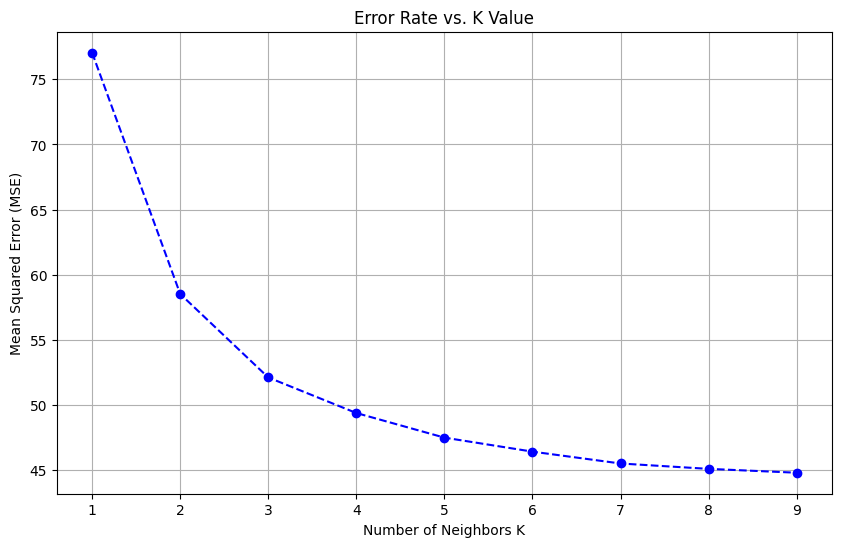

The best k value is: 9


In [47]:
# Range of k values to test
k_values = range(1, 10)
mse_values = []

# Evaluation of the model for each k value
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_knn)
    mse_values.append(mse)

# Plot error rates vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors K', fontsize=10)
plt.ylabel('Mean Squared Error (MSE)', fontsize=10)
plt.title('Error Rate vs. K Value', fontsize=12)
plt.xticks(k_values)
plt.grid(True)
plt.show()

# k value with the minimum error rate
best_k = k_values[np.argmin(mse_values)]
print(f"The best k value is: {best_k}")

In [48]:
from sklearn.feature_selection import SequentialFeatureSelector

# Create a model
knn_model = KNeighborsRegressor(n_neighbors=9)

# Create SequentialFeatureSelector object with custom parameters
sfs = SequentialFeatureSelector(estimator=knn_model, n_features_to_select='auto', tol=0.02, direction='forward', cv=5)

# Fit SequentialFeatureSelector
sfs.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[sfs.get_support()]

# Train model with selected features
knn_model.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test[selected_features])

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred)
mae_knn = mean_absolute_error(y_test, y_pred)
r2_knn = r2_score(y_test, y_pred)

print(f"K-Nearest Neighbors Mean Squared Error (MSE): {round(np.sqrt(mse_knn), 4)}")
print(f"K-Nearest Neighbors Mean Absolute Error (MAE): {round(mae_knn, 4)}")
print(f"K-Nearest Neighbors R-squared (R2): {round(r2_knn, 4)}")
print("\nSelected independent variables: ", selected_features)

K-Nearest Neighbors Mean Squared Error (MSE): 6.1058
K-Nearest Neighbors Mean Absolute Error (MAE): 3.9696
K-Nearest Neighbors R-squared (R2): 0.1588

Selected independent variables:  Index(['Use', 'Type of economic activity', 'Time', 'Day of Week'], dtype='object')


##### **4.5. Support Vector Machine**

In [52]:
# Model Training

# We remove the null values in the consumption column to train the model
dataset2_filtered2 = dataset2_filtered.dropna(subset=['Consumption (L/h)'])

# Reduce the working dataset
rows = len(dataset2_filtered2) // 100
dataset2_filtered2 = dataset2_filtered2.sample(n=rows, random_state=42)

# Independent variables
features = ["Diameter (mm)", "Use", "Type of economic activity", "Date", "Time", "Day time", "Season", "Day of Week",
            "Month", "Temperature", "Relative Humidity", "Atmospheric Pressure", "Precipitation", "Solar Radiation global"]

X = dataset2_filtered2[features]

# Target variable (dependent variable)
y = dataset2_filtered2['Consumption (L/h)']

# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We make sure that X and Y have the same length for both train and test
print("Lenght X_train:", len(X_train))
print("Length y_train:", len(y_train))
print("Lenght X_test:", len(X_test))
print("Length y_test:", len(y_test))

Lenght X_train: 14512
Length y_train: 14512
Lenght X_test: 3628
Length y_test: 3628


In [53]:
from sklearn.feature_selection import SequentialFeatureSelector

# Create a model
svm_model = SVR()

# Create SequentialFeatureSelector object with custom parameters
sfs = SequentialFeatureSelector(estimator=svm_model, n_features_to_select='auto', tol=0.02, direction='forward', cv=5)

# Fit SequentialFeatureSelector
sfs.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[sfs.get_support()]

# Train model with selected features
svm_model.fit(X_train[selected_features], y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test[selected_features])

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred)
mae_svm = mean_absolute_error(y_test, y_pred)
r2_svm = r2_score(y_test, y_pred)

print(f"Support Vector Machine Mean Squared Error (MSE):", round(np.sqrt(mse_svm), 4))
print(f"Support Vector Machine Mean Absolute Error (MAE): {round(mae_svm, 4)}")
print(f"Support Vector Machine R-squared (R2):", round(r2_svm, 4))
print("\nSelected independent variables: ", selected_features)

Support Vector Machine Mean Squared Error (MSE): 7.506
Support Vector Machine Mean Absolute Error (MAE): 3.5953
Support Vector Machine R-squared (R2): -0.2703

Selected independent variables:  Index(['Diameter (mm)'], dtype='object')


##### **4.6. Explainability**

In [ ]:
# Convert the data to numpy arrays
X_train_array = X_train.values
X_test_array = X_test.values

# We use a small subset of the training data to initialize the SHAP KernelExplainer
background = shap.kmeans(X_train_array, 10)
explainer = shap.KernelExplainer(knn_model.predict, background)

In [ ]:
# We compute SHAP values for the test set
shap_values = explainer.shap_values(X_test_array)

In [ ]:
# Convert shap_values to Explanation objects
shap_values_exp = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=X_test_array, feature_names=features)

# Visualize SHAP values
shap.initjs()

In [ ]:
shap.summary_plot(shap_values, X_test)

##### **4.7. Conclusions on Data Prediction Algorithms**

Based on the R-squared values obtained per each model I conclude that 0.2791 is the least worse model for dataset1_v2.csv data. It is considered a good model if the R-squared value is higher than 0.9, therefore non of the aboce are good models. Anyway, we will replace the missing values with the predictions of this model. We have already trained model so now we replace all null values.

In [ ]:
# Identifiquem les files amb valor Null en 'Consumption (L/h)'
missing_rows = dataset2_filtered[dataset2_filtered['Consumption (L/h)'].isnull()]

features2 = ['Use', 'Time', 'Temperature', 'Precipitations', 'Season', 'Day of Week', 'Diameter (mm)', 'Type of economic activity', 'Date']
X_ = missing_rows[features2]

# Predim els valors amb el model
predicted_values = xgb_model.predict(X_)

dataset2_filtered.loc[missing_rows.index, 'Consumption (L/h)'] = predicted_values

We now check that no null values nor negatives are in the dataset.

In [ ]:
# Number of null values in Consumption (L/h)
print("Number of Nulls in the dataset:", dataset2_filtered['Consumption (L/h)'].isnull().sum())

# Number of negatives values in Consumption (L/h)
print("Number of Negatives in the dataset:", len(dataset2_filtered[dataset2_filtered['Consumption (L/h)'] < 0]))

Lets visualize the Consumption after having cleaned and projected the incorrect values.

In [ ]:
# PLOTS

## 5. Analysis of anomalies

##### **5.1. Classification Criteria**

Previously, we stored all anomalies for later analysis. We are now going to state a classification criteria in order to classify said anomalies into 3 categories: leak or waste, system error or correct but misclassified.
This classification is based on the average of the correct real data, I'm not using the predicted one by the models but it might not be very accurate. This should be done with specific data portraying leaks, waste and system errors.

In [ ]:
# % of anomalies with respect to the original dataset
percentage = (286754 / 2100822 ) * 100
print("% of anomalies with respect to the original dataset: ", round(percentage, 2), "%")

In [ ]:
# Count of Outliers and Negative values
outliers_count = (anomalies['Consumption (L/h)'] > 0).sum()
negative_count = (anomalies['Consumption (L/h)'] < 0).sum()

total_count = len(anomalies)
outliers_percentage = (outliers_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

labels = ['Outliers', 'Negative Consumption']
sizes = [outliers_percentage, negative_percentage]
colors = ['cornflowerblue', 'lightskyblue']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Outliers and Negative Consumption')
plt.axis('equal')
plt.show()

Now we compute the minimum, average and maximum values per type of Use so we can classify each values accordingly.

In [ ]:
# For each type of Use we can compute the min, average and max values
grouped_data = clean_data.groupby('Use')['Consumption (L/h)'].agg(['min', 'mean', 'max'])

# Accessing min, average, and max values for a specific 'Use' type
use_type = 'Domèstic/Doméstico/Domestic'
domestic_min = grouped_data.loc[use_type, 'min']
domestic_average = grouped_data.loc[use_type, 'mean']
domestic_max = grouped_data.loc[use_type, 'max']

use_type = 'Comercial/Comercial/Commercial'
commercial_min = grouped_data.loc[use_type, 'min']
commercial_average = grouped_data.loc[use_type, 'mean']
commercial_max = grouped_data.loc[use_type, 'max']

use_type = 'Industrial/Industrial/Industrial'
industrial_min = grouped_data.loc[use_type, 'min']
industrial_average = grouped_data.loc[use_type, 'mean']
industrial_max = grouped_data.loc[use_type, 'max']

grouped_data

##### **5.2. Anomalies classification**

The following function gets the anomalies dataset and depending on the type of Use applies a classification. I considered consumption values over the maximum value to be of type 'Leak or Waste'. If the consumption is negative then I consider this a 'Data Collection System Error' and in case of not belonging in any of these two groups then the value would be 'Correct but Misclassified'.

In [ ]:
def anomalies_classification(dataset_anomalies):
    if dataset_anomalies['Use'] == 'Domèstic/Doméstico/Domestic':
        if dataset_anomalies['Consumption (L/h)'] > domestic_max:
            return 'Leak or Waste'
        elif dataset_anomalies['Consumption (L/h)'] < 0:
            return 'Data Collection System Error'
        else:
            return 'Correct but Misclassified'
        
    elif dataset_anomalies['Use'] == 'Comercial/Comercial/Commercial':
        if dataset_anomalies['Consumption (L/h)'] > commercial_max:
            return 'Leak or Waste'
        elif dataset_anomalies['Consumption (L/h)'] < 0:
            return 'Data Collection System Error'
        else:
            return 'Correct but Misclassified'
        
    elif dataset_anomalies['Use'] == 'Industrial/Industrial/Industrial':
        if dataset_anomalies['Consumption (L/h)'] > industrial_max:
            return 'Leak or Waste'
        elif dataset_anomalies['Consumption (L/h)'] < 0:
            return 'Data Collection System Error'
        else:
            return 'Correct but Misclassified'
    

anomalies['Classification'] = anomalies.apply(anomalies_classification, axis=1)
anomalies.head()

Now we can visualize the new classification in total and per type of Use.

In [ ]:
# Count occurrences of each classification
classification_counts = anomalies['Classification'].value_counts()
labels = classification_counts.index
sizes = classification_counts.values
colors = ['lightskyblue', 'blue', 'cornflowerblue']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Total Percentage of Each Anomaly Classification')
plt.axis('equal')
plt.show()

In [ ]:
# Filter the DataFrame
domestic_anomalies = anomalies[anomalies['Use'] == 'Domèstic/Doméstico/Domestic']

# Count occurrences of each classification
classification_counts = domestic_anomalies['Classification'].value_counts()
labels = classification_counts.index
sizes = classification_counts.values
colors = ['lightskyblue', 'blue', 'cornflowerblue'] 

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Anomaly Classification for Domestic Use')
plt.axis('equal')
plt.show()

In [ ]:
# Filter the DataFrame
domestic_anomalies = anomalies[anomalies['Use'] == 'Comercial/Comercial/Commercial']

# Count occurrences of each classification
classification_counts = domestic_anomalies['Classification'].value_counts()
labels = classification_counts.index
sizes = classification_counts.values
colors = ['lightskyblue', 'blue', 'cornflowerblue']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Anomaly Classification for Commercial Use')
plt.axis('equal') 
plt.show()

In [ ]:
# Filter the DataFrame
domestic_anomalies = anomalies[anomalies['Use'] == 'Industrial/Industrial/Industrial']

# Count occurrences of each classification
classification_counts = domestic_anomalies['Classification'].value_counts()
labels = classification_counts.index
sizes = classification_counts.values
colors = ['lightskyblue', 'blue', 'cornflowerblue']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Anomaly Classification for industrial Use')
plt.axis('equal')
plt.show()

In [ ]:
# Download anomalies
anomalies.to_csv('anomalies_dataset2_v2.csv', index=False)

## 6. Export improved data



In [ ]:
dataset2_filtered.to_csv('updated_dataset2_v2.csv', index=False)